<a href="https://colab.research.google.com/github/rharris9/SYSM578/blob/main/RHarris_First_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install researchpy --q
import pandas as pd
import numpy as np
import scipy as scipy
import researchpy as rp
import scipy.stats as stats
import plotly as pl

import warnings
warnings.filterwarnings('ignore') #Installing relevant packages

In [100]:
GeneEx = pd.read_table ('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt', header=None)

#indexing data
GeneEx.columns = GeneEx.iloc[0]
GeneEx.index = GeneEx['Id']
#Cleaning up Data Columns
GeneEx= GeneEx.drop(index='Id')
GeneEx= GeneEx.drop(['Id'], axis = 1) 
GeneEx.index=GeneEx.index.str.replace('|','_')
GeneEx= GeneEx.rename(index={'class':'Group'})
GroupName = GeneEx.iloc[0]
#Making Data Numeric
GeneEx1= GeneEx.drop(['Group'], axis=0)
GeneEx1= GeneEx1.apply(pd.to_numeric, errors="ignore")
GeneExData= GeneEx.transpose ()
GeneEx1

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517


This table calls the data for the gene *AXIN1*. *AXIN1* is identified as the most common pathogenic gene for Liver Cancer. The following cell calls *AXIN1*'s gene expression in the different tissue types and the ones that present with tumors. The following table shows the different samples as rows with the expression on the right column. As seen in the graph, the gene is most expressed in tumor presenting liver tissue. The graph's Y axis was adjusted for log scale

In [94]:
LiverGene = GeneEx1.loc['AXIN1_8312']
LiverGene

0
TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    2231.0000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    2591.0000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP     527.0000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT     578.0000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT     410.0000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT     629.0000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    1102.9082
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP     878.5131
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    1029.3753
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT     725.7143
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT     636.3893
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT     365.5804
Name: AXIN1_8312, dtype: float64

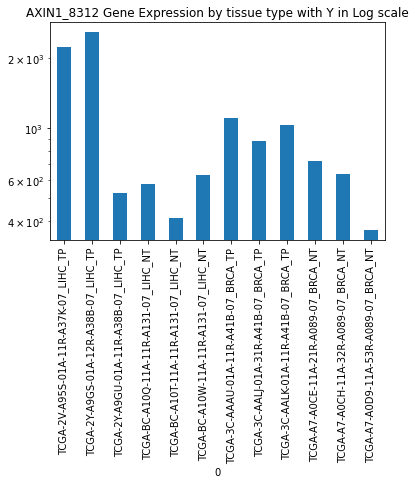

In [95]:
pd.to_numeric(LiverGene, errors='coerce').convert_dtypes().plot.bar(rot=90, logy=True, title="AXIN1_8312 Gene Expression by tissue type with Y in Log scale")

In [101]:
BCGene = GeneEx1.loc['ATN1_1822']
BCGene

0
TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP    1557.0000
TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP    1783.0000
TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP    1324.0000
TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT    1150.0000
TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT    1234.0000
TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT    1053.0000
TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP    7416.3685
TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP    6365.3672
TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP    7727.3480
TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT    4774.2857
TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT    4695.4396
TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT    4994.3992
Name: ATN1_1822, dtype: float64

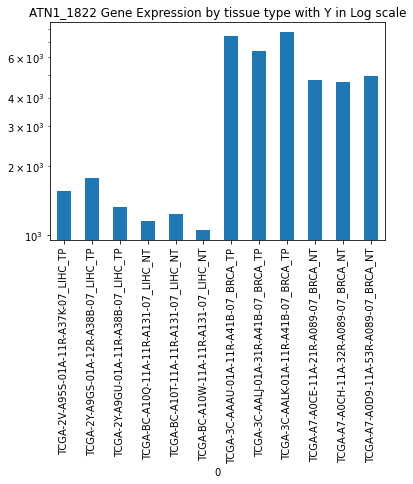

In [103]:
pd.to_numeric(BCGene, errors='coerce').convert_dtypes().plot.bar(rot=90, logy=True, title="ATN1_1822 Gene Expression by tissue type with Y in Log scale")

In [98]:
stats.ttest_ind(LiverGene[GeneExData['Group'] == 'BRCA_NT'], LiverGene[GeneExData['Group'] == 'BRCA_TP'])[1]

0.027983084787808577

In [111]:
LiverTumor= GeneEx1.iloc[:, 0]

,TCGA-2V-A95S-01A-11R-A37K-07_LIHC_TP,TCGA-2Y-A9GS-01A-12R-A38B-07_LIHC_TP,TCGA-2Y-A9GU-01A-11R-A38B-07_LIHC_TP,TCGA-BC-A10Q-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10T-11A-11R-A131-07_LIHC_NT,TCGA-BC-A10W-11A-11R-A131-07_LIHC_NT,TCGA-3C-AAAU-01A-11R-A41B-07_BRCA_TP,TCGA-3C-AALJ-01A-31R-A41B-07_BRCA_TP,TCGA-3C-AALK-01A-11R-A41B-07_BRCA_TP,TCGA-A7-A0CE-11A-21R-A089-07_BRCA_NT,TCGA-A7-A0CH-11A-32R-A089-07_BRCA_NT,TCGA-A7-A0D9-11A-53R-A089-07_BRCA_NT
Id,,,,,,,,,,,,
a100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000
a100133144,2.31,53.59,6.86,2.00,1.41,4.94,16.3644,11.6228,12.0894,4.3333,4.2087,3.0550
a100134869,5.69,5.41,6.14,0.00,2.59,1.06,12.9316,9.2294,11.0799,3.9206,2.1852,0.0000
a10357,138.30,144.07,73.93,103.92,96.89,97.03,52.1503,154.2974,143.8643,78.9238,53.6380,87.5764
a10431,1561.00,1297.00,1423.00,1454.00,1125.00,2128.00,408.0760,1360.8341,865.5358,978.4127,970.7569,770.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX_7791,4869.00,10756.00,3708.00,2799.00,1661.00,4915.00,3507.2482,5458.7489,5691.3529,6455.8730,6038.9281,2344.7047
ZZEF1_23140,1366.00,1533.00,1606.00,493.00,320.00,638.00,1894.9342,942.8830,781.1336,1314.2857,1477.3860,1997.9633
ZZZ3_26009,783.00,1746.00,412.00,486.00,694.00,482.00,1180.4565,509.5195,700.8688,968.2540,620.9685,730.6517
